In [1]:
import sys  
sys.path.append("../")

In [2]:
import modules as nn
from initializers import Xavier
from losses import LossMSE as MSE
from activations import *
from utils import *

In [3]:
import torch
#For reproducibility
torch.set_grad_enabled(False)
torch.manual_seed(0)

In [4]:
import matplotlib.pyplot as plt

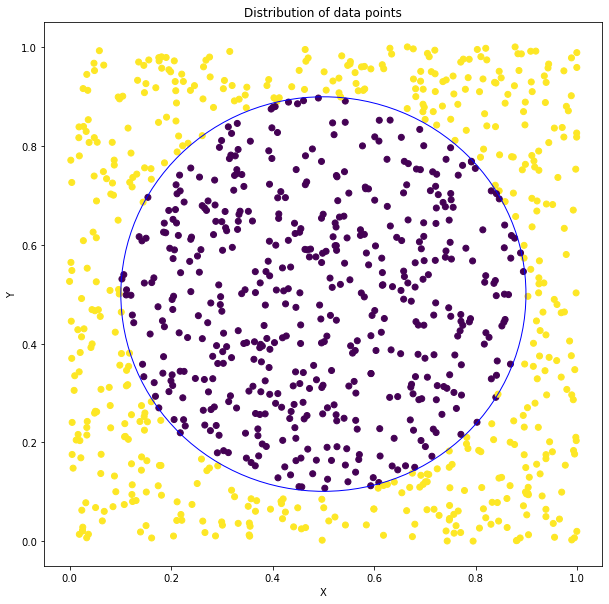

In [5]:
data, labels = get_data(1000)
#Plot the distribution of the generated data, to see how it looks like
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
plt.scatter(data[:,0].tolist(), data[:,1].tolist(), c = labels.tolist())
ax.add_patch(plt.Circle((0.5, 0.5), 1 / (math.sqrt(2*math.pi)), color='b', fill=False))
plt.savefig('disk_data.png')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Distribution of data points")
plt.show()

In [6]:
labels.size()

torch.Size([1000])

In [7]:
INPUT_UNITS = 2
HIDDEN_LAYERS = 3
HIDDEN_UNITS = 25
OUTPUT_UNITS = 2

In [8]:
# The model
model = nn.Sequential(nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                ReLU(),
                nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                ReLU(),
                nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                ReLU(),
                nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                Sigmoid()
                )
                

In [9]:
print(model)

layer = 1
w:torch.Size([25, 2])
b:torch.Size([1, 25])
--------------------------------------------------
layer = 2
w:torch.Size([25, 25])
b:torch.Size([1, 25])
--------------------------------------------------
layer = 3
w:torch.Size([25, 25])
b:torch.Size([1, 25])
--------------------------------------------------
layer = 4
w:torch.Size([2, 25])
b:torch.Size([1, 2])
--------------------------------------------------


In [10]:
#model.param()

In [11]:
# Generate the data
X_train, y_train = get_data(1000)
X_test, y_test = get_data(1000)

In [12]:
# Train the model
lrs = [0.01, 0.015, 0.04]
stats = [] 
for lr in lrs:
    print(f"Traininng model with lr={lr}:")
    # The model
    model = nn.Sequential(nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                          Sigmoid()
                         )
                            
    _, train_loss, train_acc, test_loss, test_acc = train_test_model(model,X_train,y_train,X_test,y_test,lr=lr)
    stats.append([train_loss, train_acc, test_loss, test_acc])
    print("-"*120)

Traininng model with lr=0.01:
Epoch 1: train loss=0.2914, train acccuracy=49.20% | test loss=0.2522, test acccuracy=49.80%
Epoch 5: train loss=0.2419, train acccuracy=49.20% | test loss=0.2405, test acccuracy=49.80%
Epoch 10: train loss=0.1883, train acccuracy=49.20% | test loss=0.1912, test acccuracy=49.80%
Epoch 15: train loss=0.0955, train acccuracy=49.20% | test loss=0.0891, test acccuracy=49.80%
Epoch 20: train loss=0.0553, train acccuracy=52.20% | test loss=0.0602, test acccuracy=53.60%
Epoch 25: train loss=0.0452, train acccuracy=62.30% | test loss=0.0482, test acccuracy=63.10%
Epoch 30: train loss=0.0412, train acccuracy=69.00% | test loss=0.0419, test acccuracy=68.00%
Epoch 35: train loss=0.0382, train acccuracy=71.50% | test loss=0.0377, test acccuracy=70.20%
Epoch 40: train loss=0.0376, train acccuracy=72.90% | test loss=0.0395, test acccuracy=71.00%
Epoch 45: train loss=0.0367, train acccuracy=73.40% | test loss=0.0419, test acccuracy=73.40%
Epoch 50: train loss=0.0368, tra

----

## Torch:

In [13]:
torch.set_grad_enabled(True)

In [14]:
# Train the model
torch_stats = []
for lr in lrs:
    print(f"Traininng PyTorch model with lr={lr}:")
    # The model
    torch_model = torch.nn.Sequential(torch.nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                            torch.nn.Sigmoid()
                            )
    _, train_loss, train_acc, test_loss, test_acc = torch_train_test_model(torch_model, X_train, y_train, X_test, y_test)
    torch_stats.append([train_loss, train_acc, test_loss, test_acc])
    print("-"*120)

Traininng PyTorch model with lr=0.01:
Epoch 1: train loss=0.1759, train acccuracy=49.10% | test loss=0.1327, test acccuracy=49.80%
Epoch 5: train loss=0.1258, train acccuracy=49.20% | test loss=0.1258, test acccuracy=49.80%
Epoch 10: train loss=0.1253, train acccuracy=49.20% | test loss=0.1255, test acccuracy=49.80%
Epoch 15: train loss=0.1248, train acccuracy=49.20% | test loss=0.1250, test acccuracy=49.80%
Epoch 20: train loss=0.1236, train acccuracy=49.20% | test loss=0.1240, test acccuracy=49.80%
Epoch 25: train loss=0.1205, train acccuracy=49.20% | test loss=0.1210, test acccuracy=49.80%
Epoch 30: train loss=0.1090, train acccuracy=49.20% | test loss=0.1086, test acccuracy=49.80%
Epoch 35: train loss=0.0724, train acccuracy=49.20% | test loss=0.0687, test acccuracy=49.80%
Epoch 40: train loss=0.0377, train acccuracy=49.20% | test loss=0.0371, test acccuracy=49.80%
Epoch 45: train loss=0.0262, train acccuracy=56.60% | test loss=0.0279, test acccuracy=57.60%
Epoch 50: train loss=0.0